In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import io

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE GROUP 3/Lipinski_Properties.csv')
data.head()

,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,HBD,HBA,MolecularWeight,LogP,TPSA,Num_Rotatable_Bonds,PassesLipinski
0,Bivalirudin,128270-60-0,approved; investigational,OIRCOABEOLEUMC-GEJPAHFPSA-N,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,C98H138N24O33,28.0,29.0,2180.317,-8.11643,901.57,66.0,False
1,Leuprolide,53714-56-0,approved; investigational,GFIJNRVAKGFPGQ-LIJARHBVSA-N,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,C59H84N16O12,16.0,14.0,1209.421,-1.22843,429.04,32.0,False
2,Goserelin,65807-02-5,approved,BLCLNMBMMGCOAS-URPVMXJPSA-N,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,C59H84N18O14,17.0,16.0,1269.433,-3.10570,495.89,31.0,False
3,Gramicidin D,1405-97-6,approved,NDAYQJDHGXTBJL-MWWSRJDJSA-N,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,C96H135N19O16,20.0,16.0,1811.253,4.86760,519.89,51.0,False
4,Desmopressin,16679-58-6,approved,NFLWUMRGJYTJIN-PNIOQBSNSA-N,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,C46H64N14O12S2,14.0,15.0,1069.238,-4.13203,435.41,19.0,False


In [3]:
#Drop columns that are not needed

df = data.drop(["CAS Number","Drug Groups","InChIKey","InChI"], axis=1)

In [4]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 42.5 MB/s eta 0:00:00


In [5]:
#Implement the SAS scoring algorithm

from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

def calculate_sas(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Calculate molecular complexity
        complexity = rdMolDescriptors.CalcNumRotatableBonds(mol) + \
                     Descriptors.HeavyAtomCount(mol) + \
                     Descriptors.NHOHCount(mol) + \
                     Descriptors.NOCount(mol) + \
                     Descriptors.NumHAcceptors(mol) + \
                     Descriptors.NumHDonors(mol)

        # Calculate the number of reaction steps required
        num_reaction_steps = min(5, complexity - 4)  # Limit the steps to 5

        # Check for specific functional groups
        functional_groups = ["(=O)", "(=N)", "(#N)", "(=S)", "C#C"]
        for group in functional_groups:
            if group in smiles:
                num_reaction_steps += 1

        # Calculate the SAS score
        sas_score = 10 - num_reaction_steps
        return sas_score
    else:
        return None

# Add SAS scores as a new column

df['SAS'] = df['SMILES'].apply(calculate_sas)


[17:37:54] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:37:54] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:37:54] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:37:55] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[17:37:55] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[17:37:55] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
[17:37:55] Explicit valence for atom # 19 O, 3, is greater than permitted
[17:

In [6]:
#Draw the structures and add them to a new column

from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Filter out rows with invalid SMILES
df = df[df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) is not None)]

# Create a new column 'Structure' with RDKit Mol objects
df['Structure'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# Save the DataFrame to a CSV file
df.to_csv('Capstone Dataset.csv', index=False)

[17:40:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:40:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:40:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:40:11] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[17:40:11] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[17:40:11] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
[17:40:12] Explicit valence for atom # 19 O, 3, is greater than permitted
[17:

In [7]:
df.head()

,Name,SMILES,Formula,HBD,HBA,MolecularWeight,LogP,TPSA,Num_Rotatable_Bonds,PassesLipinski,SAS,Structure
0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,C98H138N24O33,28.0,29.0,2180.317,-8.11643,901.57,66.0,False,4.0,<rdkit.Chem.rdchem.Mol object at 0x7ef0e7fc9bd0>
1,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,C59H84N16O12,16.0,14.0,1209.421,-1.22843,429.04,32.0,False,4.0,<rdkit.Chem.rdchem.Mol object at 0x7ef0e7fc9d90>
2,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,C59H84N18O14,17.0,16.0,1269.433,-3.10570,495.89,31.0,False,4.0,<rdkit.Chem.rdchem.Mol object at 0x7ef0e7fc9e00>
3,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,C96H135N19O16,20.0,16.0,1811.253,4.86760,519.89,51.0,False,4.0,<rdkit.Chem.rdchem.Mol object at 0x7ef0e7fc9e70>
4,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,C46H64N14O12S2,14.0,15.0,1069.238,-4.13203,435.41,19.0,False,4.0,<rdkit.Chem.rdchem.Mol object at 0x7ef0e7fc9ee0>


##**Encoding Features (Feature Engineering)**

In [9]:
#Import necessary libraries

from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

In [10]:
#Encoding Features (SMILES and PassesLipinski)

from sklearn.preprocessing import LabelEncoder

# Encode PassesLipinski

le = preprocessing.LabelEncoder()
PassesLipinski_0 = le.fit_transform(df['PassesLipinski'])

df.iloc[:,9] = PassesLipinski_0

#Encode the 6 properties

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the labels
for column in ['HBD', 'HBA', 'MolecularWeight', 'LogP', 'TPSA', 'Num_Rotatable_Bonds', 'SAS']:
    df[column] = label_encoder.fit_transform(df[column])


In [13]:
# Function to convert SMILES to Morgan fingerprints
def smiles_to_morgan_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return fingerprint.ToBitString()

# Apply the function to your DataFrame and store the numerical representation
df['Morgan_Fingerprint'] = df['SMILES'].apply(smiles_to_morgan_fingerprint)

[17:52:14] Unusual charge on atom 0 number of radical electrons set to zero
[17:52:18] WARNING: not removing hydrogen atom without neighbors
[17:52:18] WARNING: not removing hydrogen atom without neighbors


In [48]:
#Drop columns that are not needed

df_1 = df.drop(["Name","SMILES","Formula","Structure","Morgan_Fingerprint"], axis=1)

In [49]:
df_1.head()

,HBD,HBA,MolecularWeight,LogP,TPSA,Num_Rotatable_Bonds,PassesLipinski,SAS
0,28,29,10090,114,5221,62,0,2
1,16,14,9935,1346,5079,32,0,2
2,17,16,9953,563,5128,31,0,2
3,20,16,10072,9456,5141,50,0,2
4,14,15,9882,355,5082,19,0,2


##**Data Splitting**

In [50]:
X = df_1[['HBD', 'HBA', 'MolecularWeight','LogP','TPSA','Num_Rotatable_Bonds','SAS']] #Features
y = df_1['PassesLipinski'] #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (9253, 7)
Train labels shape: (9253,)
Test data shape: (2314, 7)
Test labels shape: (2314,)


##**RANDOM FOREST MODEL**

##**Model Training**

In [27]:
# Initialize and train the Random Forest classification model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##**Model Evaluation**

In [31]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report:\n{report}")


Balanced Accuracy: 0.9993540051679586
ROC AUC: 0.9999991610456728
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00      1540

    accuracy                           1.00      2314
   macro avg       1.00      1.00      1.00      2314
weighted avg       1.00      1.00      1.00      2314



##**Model Validation**

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

# Define your model (Random Forest Classifier, for example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the input features (X) and target variable (y)
X = df_1[['HBD', 'HBA', 'MolecularWeight','LogP','TPSA','Num_Rotatable_Bonds']]
y = df_1['PassesLipinski']

# Define the number of folds for cross-validation (e.g., 5-fold cross-validation)
num_folds = 5

# Create a cross-validation strategy (StratifiedKFold is a good choice for classification)
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores (e.g., accuracy)
scores = cross_val_score(model, X, y, cv=cv, scoring='balanced_accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_balanced_accuracy = scores.mean()
std_balanced_accuracy = scores.std()
print("Mean Balanced Accuracy:", mean_balanced_accuracy)
print("Standard Deviation of Balanced Accuracy:", std_balanced_accuracy)


Cross-Validation Scores: [0.99935401 0.99902933 1.         1.         0.99902849]
Mean Balanced Accuracy: 0.9994823658312331
Standard Deviation of Balanced Accuracy: 0.00043900064675061453


##**Hyperparameter Tuning**

In [35]:
from sklearn.model_selection import GridSearchCV

# Define your model (Random Forest Classifier, for example)
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='balanced_accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-Validation Score (Balanced_Accuracy):", best_score)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best Cross-Validation Score (Balanced_Accuracy): 0.9992874762503787


##**Finalize The Model**

In [36]:
# Create a new Random Forest Classifier with the best hyperparameters
best_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=150,
    random_state=42  # You can add this if it's not included in the best_params
)

# Train the best model on the full training dataset
best_model.fit(X, y)


RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=42)

##**Model Interpretation**

In [37]:
from sklearn.ensemble import RandomForestClassifier  # for classification

# Assuming you've already trained your model, e.g., rf_model
feature_importance_scores = rf_classifier.feature_importances_

In [39]:
#Analyze feature importance scores

sorted_indices = feature_importance_scores.argsort()[::-1]
sorted_features = [('HBD', 'HBA', 'MolecularWeight','LogP','TPSA','Num_Rotatable_Bonds','SAS')[i] for i in sorted_indices]


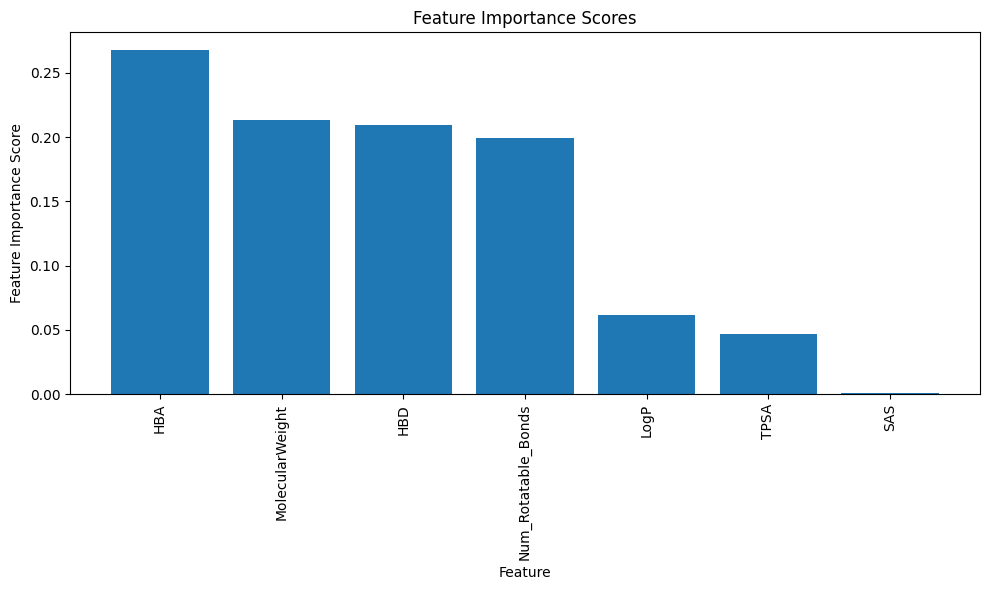

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), feature_importance_scores[sorted_indices])
plt.xticks(range(len(sorted_features)), [sorted_features[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 773    1]
 [   0 1540]]


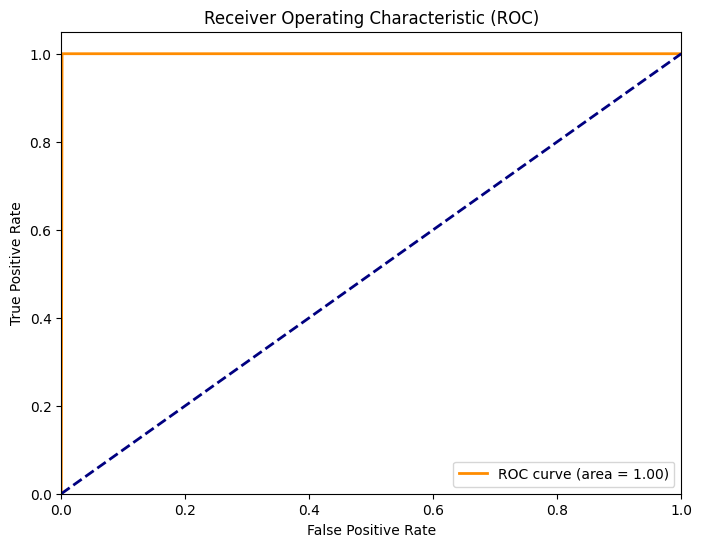

In [42]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


##**Model Deployment**

In [ ]:
#Deploy the model

In [43]:
import joblib

# Save the trained model to a file
joblib.dump(rf_classifier, 'RandomForestModel.pkl')

['RandomForestModel.pkl']

##**GRADIENT BOOSTING**

##**Model Training**

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

#Define the Gradient Boosting Classifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Train the model

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

##**Model Evaluation**

In [55]:
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Balanced Accuracy: 0.998062015503876
Confusion Matrix:
[[ 771    3]
 [   0 1540]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00      1540

    accuracy                           1.00      2314
   macro avg       1.00      1.00      1.00      2314
weighted avg       1.00      1.00      1.00      2314



##**Model validation**

In [56]:
# Define your model (Gradient Boosting Classifier)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the input features (X) and target variable (y)
X = df_1[['HBD', 'HBA', 'MolecularWeight', 'LogP', 'TPSA', 'Num_Rotatable_Bonds', 'SAS']]
y = df_1['PassesLipinski']

# Define the number of folds for cross-validation (e.g., 5-fold cross-validation)
num_folds = 5

# Create a cross-validation strategy (StratifiedKFold is a good choice for classification)
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores (e.g., balanced accuracy)
scores = cross_val_score(model, X, y, cv=cv, scoring='balanced_accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_balanced_accuracy = scores.mean()
std_balanced_accuracy = scores.std()
print("Mean Balanced Accuracy:", mean_balanced_accuracy)
print("Standard Deviation of Balanced Accuracy:", std_balanced_accuracy)


Cross-Validation Scores: [0.99935401 0.99870801 1.         0.99870801 0.99935317]
Mean Balanced Accuracy: 0.9992246390618785
Standard Deviation of Balanced Accuracy: 0.00048337371059092014


##**Hyperparameter Tuning**

In [57]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [58]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


##**Finalize The Model**

In [59]:
# Create the finalized Gradient Boosting Classifier with the best hyperparameters
finalized_model = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

# Fit the finalized model on your entire dataset
finalized_model.fit(X, y)


GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=42)

##**Model Interpretation**

Feature Importance Scores:
               Feature  Importance
4                 TPSA    0.370629
3                 LogP    0.262860
2      MolecularWeight    0.202604
5  Num_Rotatable_Bonds    0.157120
0                  HBD    0.006684
1                  HBA    0.000103
6                  SAS    0.000000


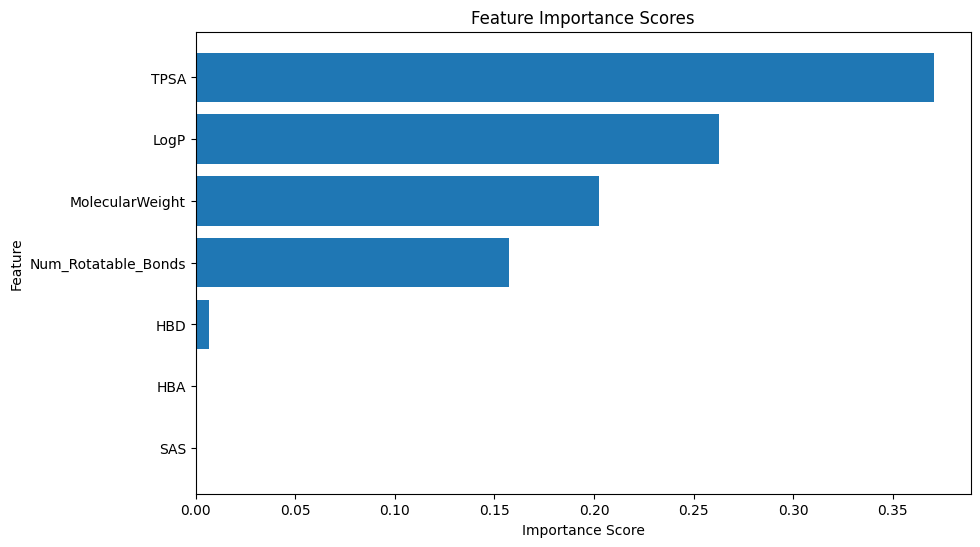

In [65]:

# Retrieve the feature importance scores
feature_importances = gb_classifier.feature_importances_

# Feature names from your DataFrame
feature_names = ['HBD', 'HBA', 'MolecularWeight', 'LogP', 'TPSA', 'Num_Rotatable_Bonds', 'SAS']

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importance Scores:")
print(feature_importance_df)

# You can also create a plot to visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


Feature Importance Scores:
               Feature    Importance
4                 TPSA  4.287677e-01
3                 LogP  3.002188e-01
5  Num_Rotatable_Bonds  1.520894e-01
2      MolecularWeight  1.101348e-01
0                  HBD  8.460237e-03
1                  HBA  3.289137e-04
6                  SAS  2.522593e-07


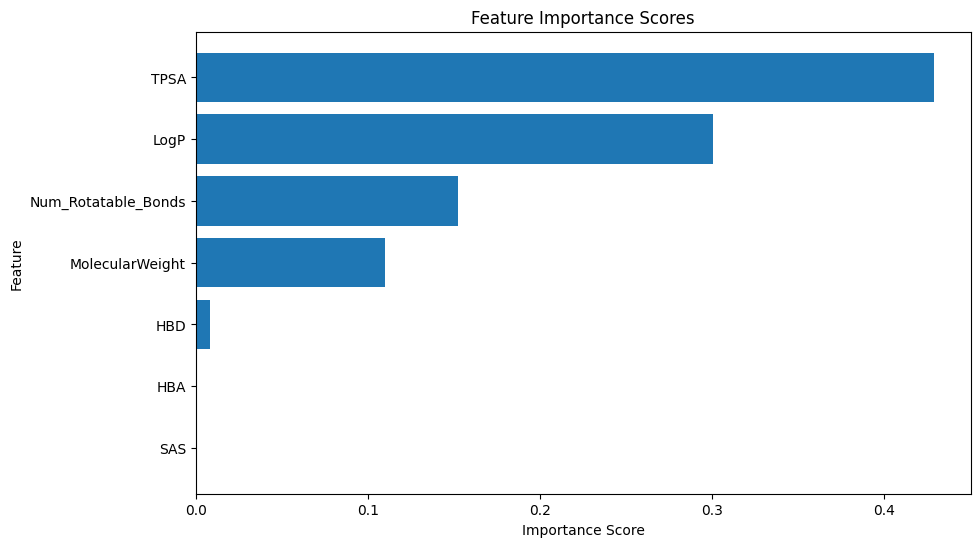

In [66]:

# Retrieve the feature importance scores
feature_importances = finalized_model.feature_importances_

# Feature names from your DataFrame
feature_names = ['HBD', 'HBA', 'MolecularWeight', 'LogP', 'TPSA', 'Num_Rotatable_Bonds', 'SAS']

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importance Scores:")
print(feature_importance_df)

# You can also create a plot to visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


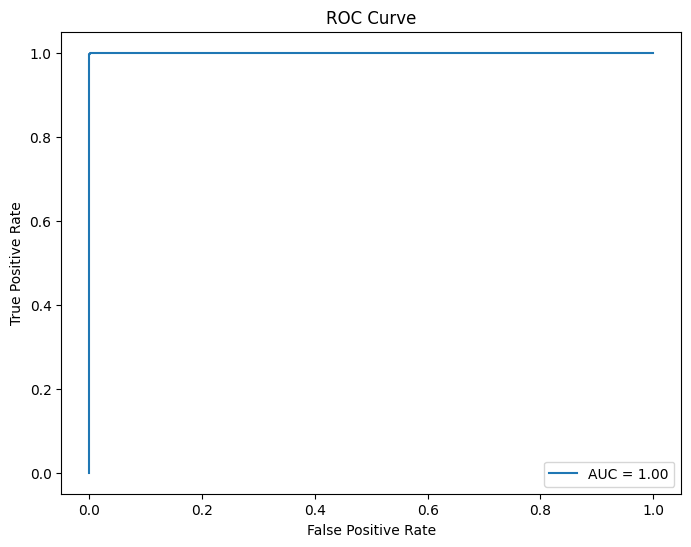

In [67]:
# Calculate ROC curve
y_probs = gb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

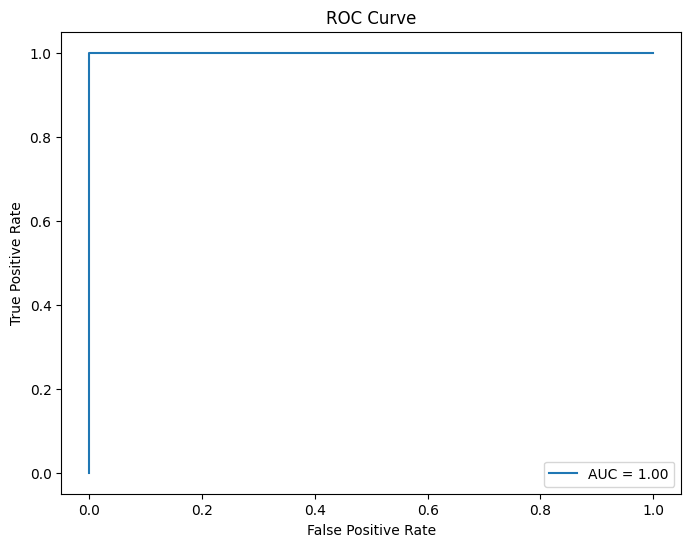

In [68]:
# Calculate ROC curve
y_probs = finalized_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##**Model Deployment**

In [69]:
import joblib

# Save the trained model to a file
joblib.dump(rf_classifier, 'RandomForestModel_and_GradientBoosting.pkl')

['RandomForestModel_and_GradientBoosting.pkl']